In [1]:
import sys
import os, numpy as np
import pandas as pd
import seaborn as sns


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from weather.data_loader import load_data
import matplotlib.pyplot as plt

In [3]:
file_path = os.path.join('..', 'data', 'processed', 'after_encoded.csv')
df_model = load_data(file_path)

In [4]:
df_model.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,3
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,2
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,1
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,1
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,3
5,32.0,55,3.5,26.0,2,1010.03,2,2,5.0,1,2
6,-2.0,97,8.0,86.0,2,990.87,1,3,4.0,1,4
7,3.0,85,6.0,96.0,3,984.46,1,3,3.5,1,4
8,3.0,83,6.0,66.0,2,999.44,0,3,1.0,2,4
9,28.0,74,8.5,107.0,0,1012.13,8,3,7.5,0,1


In [5]:
df_model.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover               int64
Atmospheric Pressure    float64
UV Index                  int64
Season                    int64
Visibility (km)         float64
Location                  int64
Weather Type              int64
dtype: object

In [6]:
df_subset = df_model.sample(300, random_state=42)

In [7]:
output_csv_path = os.path.join('..', 'data', 'processed', 'df_subset.csv')
df_subset.to_csv(output_csv_path, index=False)

print(f"DataFrame berhasil disimpan ke {output_csv_path}")

DataFrame berhasil disimpan ke ..\data\processed\df_subset.csv


In [8]:
file_path = os.path.join('..', 'data', 'processed', 'df_subset.csv')
dfmodel = load_data(file_path)

In [9]:
dfmodel.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,23.0,38,4.5,6.0,0,1021.19,9,0,10.0,1,1
1,62.0,94,14.5,83.0,0,1025.57,10,2,4.0,1,1
2,40.0,51,2.0,12.0,3,1025.15,8,1,8.0,2,1
3,-7.0,79,6.5,90.0,2,993.56,0,3,1.5,1,4
4,21.0,94,10.0,109.0,3,1027.71,11,1,9.0,2,1
5,-9.0,88,12.5,79.0,2,988.76,0,3,1.0,1,4
6,41.0,79,2.5,49.0,1,851.14,3,3,15.5,1,1
7,15.0,90,11.0,57.0,3,1012.32,3,3,5.0,0,3
8,0.0,46,8.0,45.0,2,1080.20,9,1,3.5,0,1
9,-9.0,94,0.0,56.0,2,987.75,1,3,3.5,2,4


In [10]:
dfmodel.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover               int64
Atmospheric Pressure    float64
UV Index                  int64
Season                    int64
Visibility (km)         float64
Location                  int64
Weather Type              int64
dtype: object

In [11]:
dfmodel.shape

(300, 11)

In [12]:
X = dfmodel.drop(columns=['Weather Type'])
y = dfmodel['Weather Type']      

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Prediksi
y_pred_dt = dt_model.predict(X_test)

# Evaluasi
print("Decision Tree Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt)

class_labels = ['Sunny (1)', 'Cloudy (2)', 'Rainy (3)', 'Snowy (4)']

cm_df_dt = pd.DataFrame(cm_dt, index=class_labels, columns=class_labels)

print("\nConfusion Matrix (dengan label):")
print(cm_df_dt)


for i, row in enumerate(cm_dt):
    actual_class = class_labels[i]
    total = np.sum(row)
    print(f"\nBaris {i+1} ({actual_class}):")
    for j, val in enumerate(row):
        predicted_class = class_labels[j]
        if i == j:
            print(f"  - {val} diklasifikasikan **BENAR** sebagai {predicted_class}")
        else:
            print(f"  - {val} diklasifikasikan **SALAH** sebagai {predicted_class}")
    print(f"  → Total data aktual kelas ini: {total}")

Decision Tree Performance:
Accuracy: 0.8666666666666667
[[14  0  1  0]
 [ 2  8  0  0]
 [ 1  0 12  2]
 [ 2  0  0 18]]
              precision    recall  f1-score   support

           1       0.74      0.93      0.82        15
           2       1.00      0.80      0.89        10
           3       0.92      0.80      0.86        15
           4       0.90      0.90      0.90        20

    accuracy                           0.87        60
   macro avg       0.89      0.86      0.87        60
weighted avg       0.88      0.87      0.87        60


Confusion Matrix (dengan label):
            Sunny (1)  Cloudy (2)  Rainy (3)  Snowy (4)
Sunny (1)          14           0          1          0
Cloudy (2)          2           8          0          0
Rainy (3)           1           0         12          2
Snowy (4)           2           0          0         18

Baris 1 (Sunny (1)):
  - 14 diklasifikasikan **BENAR** sebagai Sunny (1)
  - 0 diklasifikasikan **SALAH** sebagai Cloudy (2)
  - 1 di

In [17]:
result_df = X_test.copy()
result_df['Actual'] = y_test.values
result_df['Predicted'] = y_pred_dt
result_df = result_df.reset_index()  

print("\nDetail Baris Klasifikasi:")
unique_labels = sorted(y.unique())
for label in unique_labels:
    class_name = class_labels[label - 1] 
    correct_preds = result_df[(result_df['Actual'] == label) & (result_df['Predicted'] == label)]
    incorrect_preds = result_df[(result_df['Actual'] == label) & (result_df['Predicted'] != label)]

    print(f"\n{len(correct_preds)} diklasifikasikan BENAR sebagai {class_name}:")
    print("Indeks baris asli:", correct_preds['index'].tolist())

    for pred in incorrect_preds['Predicted'].unique():
        pred_class_name = class_labels[pred - 1]
        rows = incorrect_preds[incorrect_preds['Predicted'] == pred]
        print(f"{len(rows)} diklasifikasikan SALAH sebagai {pred_class_name}:")
        print("Indeks baris asli:", rows['index'].tolist())


Detail Baris Klasifikasi:

14 diklasifikasikan BENAR sebagai Sunny (1):
Indeks baris asli: [152, 237, 45, 165, 249, 281, 238, 17, 33, 60, 63, 239, 278, 25]
1 diklasifikasikan SALAH sebagai Rainy (3):
Indeks baris asli: [46]

8 diklasifikasikan BENAR sebagai Cloudy (2):
Indeks baris asli: [57, 289, 211, 295, 157, 286, 77, 229]
2 diklasifikasikan SALAH sebagai Sunny (1):
Indeks baris asli: [104, 119]

12 diklasifikasikan BENAR sebagai Rainy (3):
Indeks baris asli: [266, 233, 175, 221, 148, 78, 215, 73, 144, 75, 97, 192]
1 diklasifikasikan SALAH sebagai Sunny (1):
Indeks baris asli: [226]
2 diklasifikasikan SALAH sebagai Snowy (4):
Indeks baris asli: [182, 7]

18 diklasifikasikan BENAR sebagai Snowy (4):
Indeks baris asli: [203, 9, 196, 5, 113, 250, 42, 164, 24, 90, 93, 76, 234, 111, 231, 180, 297, 92]
2 diklasifikasikan SALAH sebagai Sunny (1):
Indeks baris asli: [109, 218]


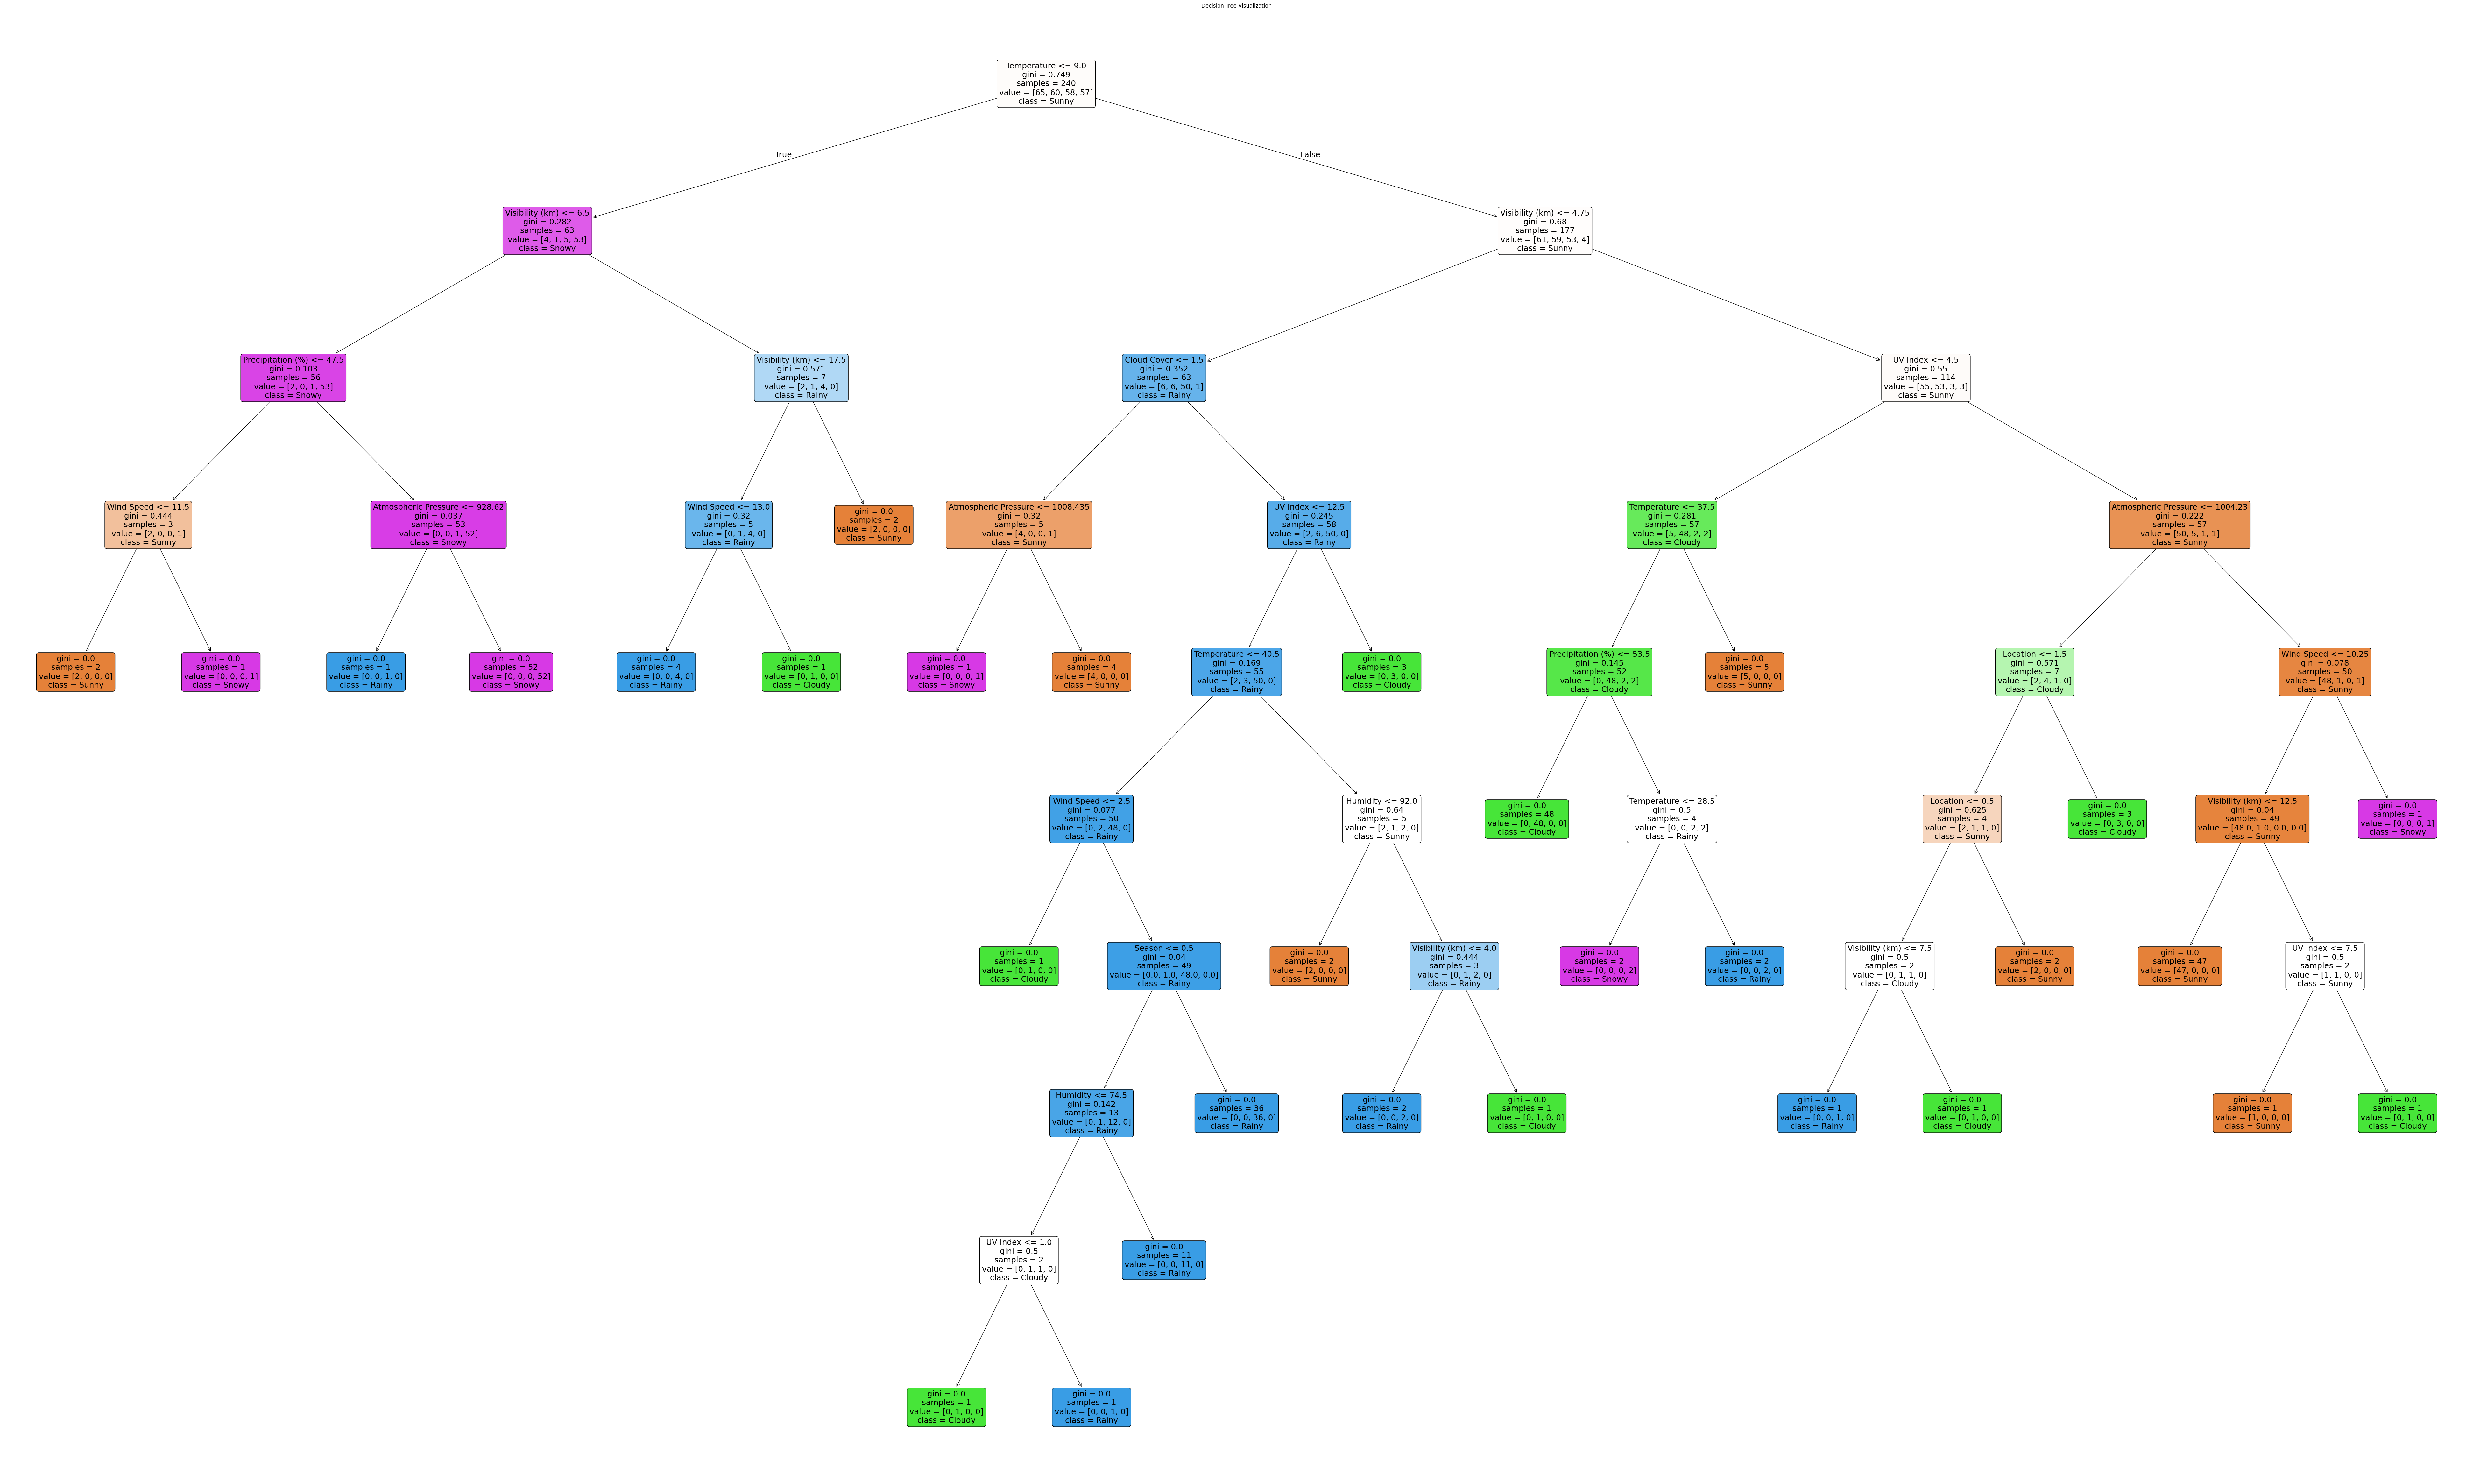

In [18]:
plt.figure(figsize=(100, 60))
plot_tree(dt_model, 
          feature_names=X.columns, 
          class_names=["Sunny", "Cloudy", "Rainy", "Snowy"],  
          filled=True, 
          rounded=True, 
          max_depth=None)
plt.title("Decision Tree Visualization")
plt.show()
plt.close()

In [ ]:
output_file_path = os.path.join('..', 'data', 'result_visual', 'dcs_modelRule.txt')

with open(output_file_path, "w") as f:
    tree_rule = export_text(dt_model, feature_names=list(X.columns))
    f.write("Aturan Decision Tree:\n")
    f.write(tree_rule)

print(f"Aturan decision tree berhasil disimpan di: {output_file_path}")

Aturan decision tree berhasil disimpan di: ..\data\result_visual\dt_modelRule.txt


In [21]:
# Prediksi dengan data baru 
new_data = pd.DataFrame({
    'Temperature': [25.0],
    'Humidity': [60],
    'Wind Speed': [5.0],
    'Precipitation (%)': [10.0],
    'Cloud Cover': [2], 
    'Atmospheric Pressure': [1012.0],
    'UV Index': [3],
    'Season': [1], 
    'Visibility (km)': [10.0],
    'Location': [0] 
})

prediksi = dt_model.predict(new_data)

reverse_weather_type = {1: 'Sunny', 2: 'Cloudy', 3: 'Rainy', 4: 'Snowy'}
hasil_prediksi = [reverse_weather_type[p] for p in prediksi]

print("Hasil Prediksi:", hasil_prediksi)

Hasil Prediksi: ['Cloudy']


In [14]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print("\nNaive Bayes Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_df_nb = pd.DataFrame(cm_nb, index=class_labels, columns=class_labels)

print("\nConfusion Matrix (dengan label):")
print(cm_df_nb)

for i, row in enumerate(cm_nb):
    actual_class = class_labels[i]
    total = np.sum(row)
    print(f"\nBaris {i+1} ({actual_class}):")
    for j, val in enumerate(row):
        predicted_class = class_labels[j]
        if i == j:
            print(f"  - {val} diklasifikasikan **BENAR** sebagai {predicted_class}")
        else:
            print(f"  - {val} diklasifikasikan **SALAH** sebagai {predicted_class}")
    print(f"  → Total data aktual kelas ini: {total}")


Naive Bayes Performance:
Accuracy: 0.8166666666666667
[[13  1  1  0]
 [ 3  7  0  0]
 [ 1  1 11  2]
 [ 2  0  0 18]]
              precision    recall  f1-score   support

           1       0.68      0.87      0.76        15
           2       0.78      0.70      0.74        10
           3       0.92      0.73      0.81        15
           4       0.90      0.90      0.90        20

    accuracy                           0.82        60
   macro avg       0.82      0.80      0.80        60
weighted avg       0.83      0.82      0.82        60


Confusion Matrix (dengan label):
            Sunny (1)  Cloudy (2)  Rainy (3)  Snowy (4)
Sunny (1)          13           1          1          0
Cloudy (2)          3           7          0          0
Rainy (3)           1           1         11          2
Snowy (4)           2           0          0         18

Baris 1 (Sunny (1)):
  - 13 diklasifikasikan **BENAR** sebagai Sunny (1)
  - 1 diklasifikasikan **SALAH** sebagai Cloudy (2)
  - 1 dik

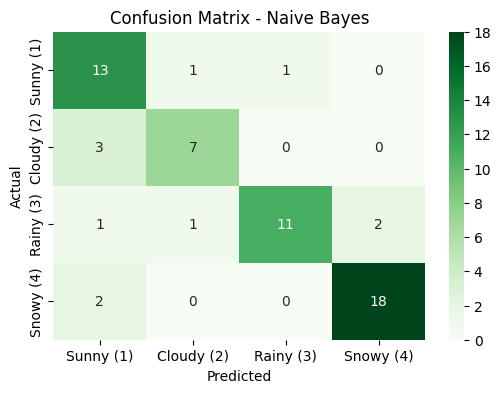

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
plt.close()

In [18]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr)}")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_df_lr = pd.DataFrame(cm_lr, index=class_labels, columns=class_labels)

print("\nConfusion Matrix (dengan label):")
print(cm_df_lr)

for i, row in enumerate(cm_lr):
    actual_class = class_labels[i]
    total = np.sum(row)
    print(f"\nBaris {i+1} ({actual_class}):")
    for j, val in enumerate(row):
        predicted_class = class_labels[j]
        if i == j:
            print(f"  - {val} diklasifikasikan **BENAR** sebagai {predicted_class}")
        else:
            print(f"  - {val} diklasifikasikan **SALAH** sebagai {predicted_class}")
    print(f"  → Total data aktual kelas ini: {total}")

d:\2. Sofia Azzahra Alamsyah\Sofia TIF\Semester 6\Data Mining\Tugas\Tubes\Weather-type\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Performance:
Accuracy: 0.85
[[13  2  0  0]
 [ 1  9  0  0]
 [ 1  2 11  1]
 [ 2  0  0 18]]
              precision    recall  f1-score   support

           1       0.76      0.87      0.81        15
           2       0.69      0.90      0.78        10
           3       1.00      0.73      0.85        15
           4       0.95      0.90      0.92        20

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.84        60
weighted avg       0.87      0.85      0.85        60


Confusion Matrix (dengan label):
            Sunny (1)  Cloudy (2)  Rainy (3)  Snowy (4)
Sunny (1)          13           2          0          0
Cloudy (2)          1           9          0          0
Rainy (3)           1           2         11          1
Snowy (4)           2           0          0         18

Baris 1 (Sunny (1)):
  - 13 diklasifikasikan **BENAR** sebagai Sunny (1)
  - 2 diklasifikasikan **SALAH** sebagai Cloudy (2)
  - 0 diklasifi

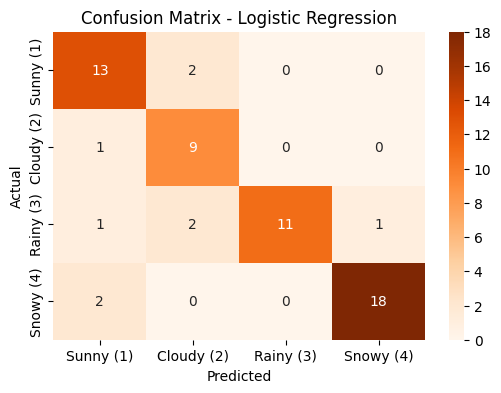

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Oranges", xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
plt.close()

In [22]:
c45_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
c45_model.fit(X_train, y_train)

# Prediksi
y_pred_c45 = c45_model.predict(X_test)

#  Evaluasi 
y_pred = c45_model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm_c45 = confusion_matrix(y_test, y_pred_dt)

class_labels = ['Sunny (1)', 'Cloudy (2)', 'Rainy (3)', 'Snowy (4)']

cm_df_c45 = pd.DataFrame(cm_c45, index=class_labels, columns=class_labels)

print("\nConfusion Matrix (dengan label):")
print(cm_df_c45)


for i, row in enumerate(cm_c45):
    actual_class = class_labels[i]
    total = np.sum(row)
    print(f"\nBaris {i+1} ({actual_class}):")
    for j, val in enumerate(row):
        predicted_class = class_labels[j]
        if i == j:
            print(f"  - {val} diklasifikasikan **BENAR** sebagai {predicted_class}")
        else:
            print(f"  - {val} diklasifikasikan **SALAH** sebagai {predicted_class}")
    print(f"  → Total data aktual kelas ini: {total}")

Akurasi: 0.9068181818181819
Confusion Matrix:
 [[577  25  19  20]
 [ 19 583  27  22]
 [ 19  41 575  12]
 [ 16   8  18 659]]

Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.90      0.91       641
           2       0.89      0.90      0.89       651
           3       0.90      0.89      0.89       647
           4       0.92      0.94      0.93       701

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640


Confusion Matrix (dengan label):
            Sunny (1)  Cloudy (2)  Rainy (3)  Snowy (4)
Sunny (1)         579          26         15         21
Cloudy (2)         19         576         39         17
Rainy (3)          19          44        574         10
Snowy (4)          11          18         10        662

Baris 1 (Sunny (1)):
  - 579 diklasifikasikan **BENAR** sebagai Sunny (1)
  - 26 diklasifikasikan **S

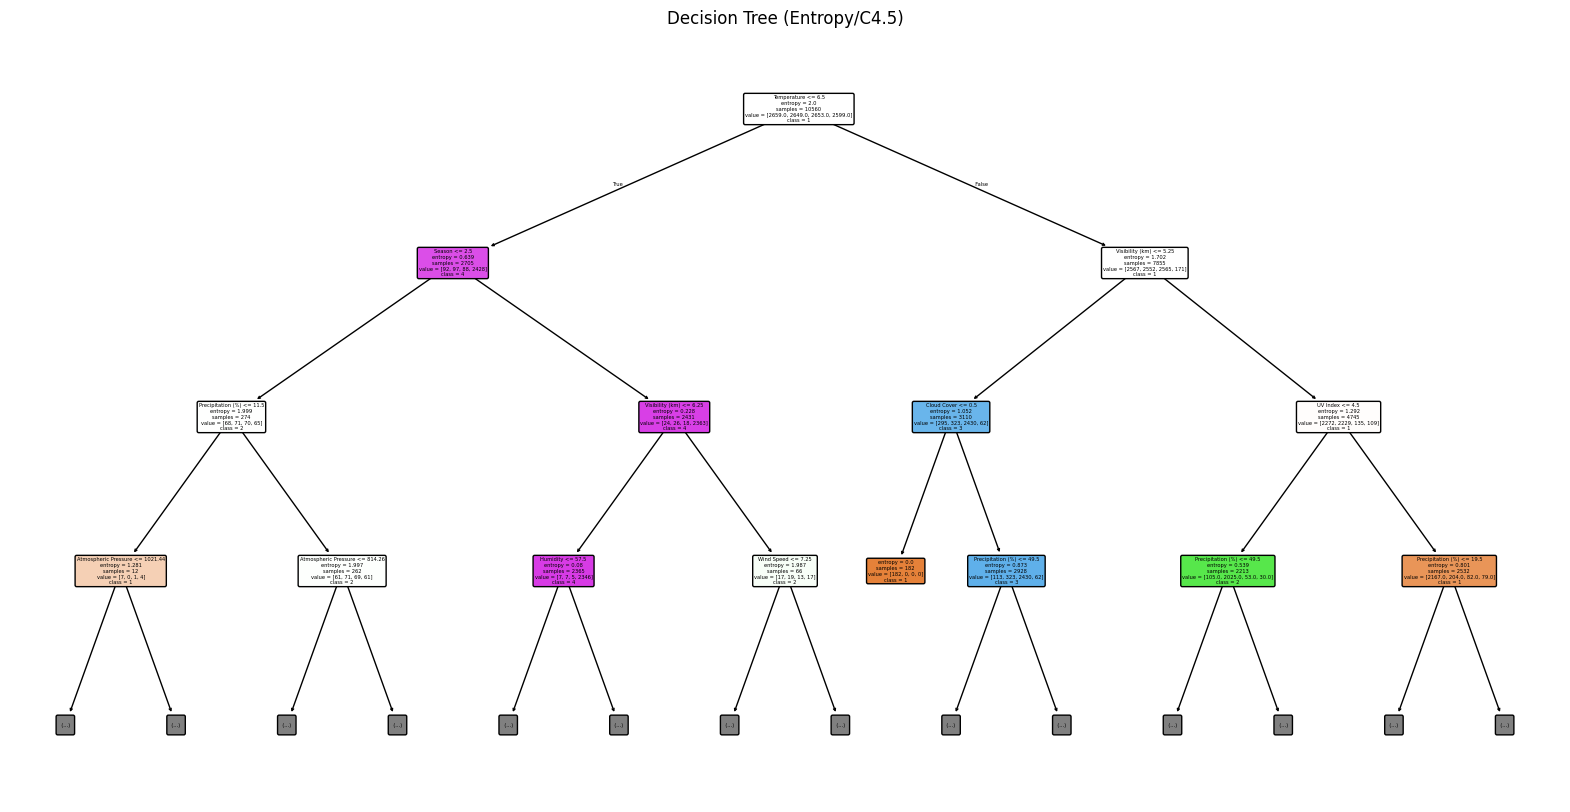

In [ ]:
plt.figure(figsize=(20, 10))
plot_tree(c45_model, 
          feature_names=X.columns, 
          class_names=c45_model.classes_.astype(str), 
          filled=True, 
          rounded=True, 
          max_depth=3)
plt.title("Decision Tree (Entropy/C4.5)")
plt.show()
plt.close()

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

# Evaluasi
print("Random Forest Performance:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

cm_rand = confusion_matrix(y_test, y_pred_dt)

class_labels = ['Sunny (1)', 'Cloudy (2)', 'Rainy (3)', 'Snowy (4)']

cm_df_rand = pd.DataFrame(cm_rand, index=class_labels, columns=class_labels)

print("\nConfusion Matrix (dengan label):")
print(cm_df_rand)


for i, row in enumerate(cm_rand):
    actual_class = class_labels[i]
    total = np.sum(row)
    print(f"\nBaris {i+1} ({actual_class}):")
    for j, val in enumerate(row):
        predicted_class = class_labels[j]
        if i == j:
            print(f"  - {val} diklasifikasikan **BENAR** sebagai {predicted_class}")
        else:
            print(f"  - {val} diklasifikasikan **SALAH** sebagai {predicted_class}")
    print(f"  → Total data aktual kelas ini: {total}")

Random Forest Performance:
[[577  31  11  22]
 [ 23 581  33  14]
 [ 13  38 586  10]
 [ 12  20   9 660]]
              precision    recall  f1-score   support

           1       0.92      0.90      0.91       641
           2       0.87      0.89      0.88       651
           3       0.92      0.91      0.91       647
           4       0.93      0.94      0.94       701

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640


Confusion Matrix (dengan label):
            Sunny (1)  Cloudy (2)  Rainy (3)  Snowy (4)
Sunny (1)         579          26         15         21
Cloudy (2)         19         576         39         17
Rainy (3)          19          44        574         10
Snowy (4)          11          18         10        662

Baris 1 (Sunny (1)):
  - 579 diklasifikasikan **BENAR** sebagai Sunny (1)
  - 26 diklasifikasikan **SALAH** sebagai Cloudy (2)
  - 15 diklasifikas

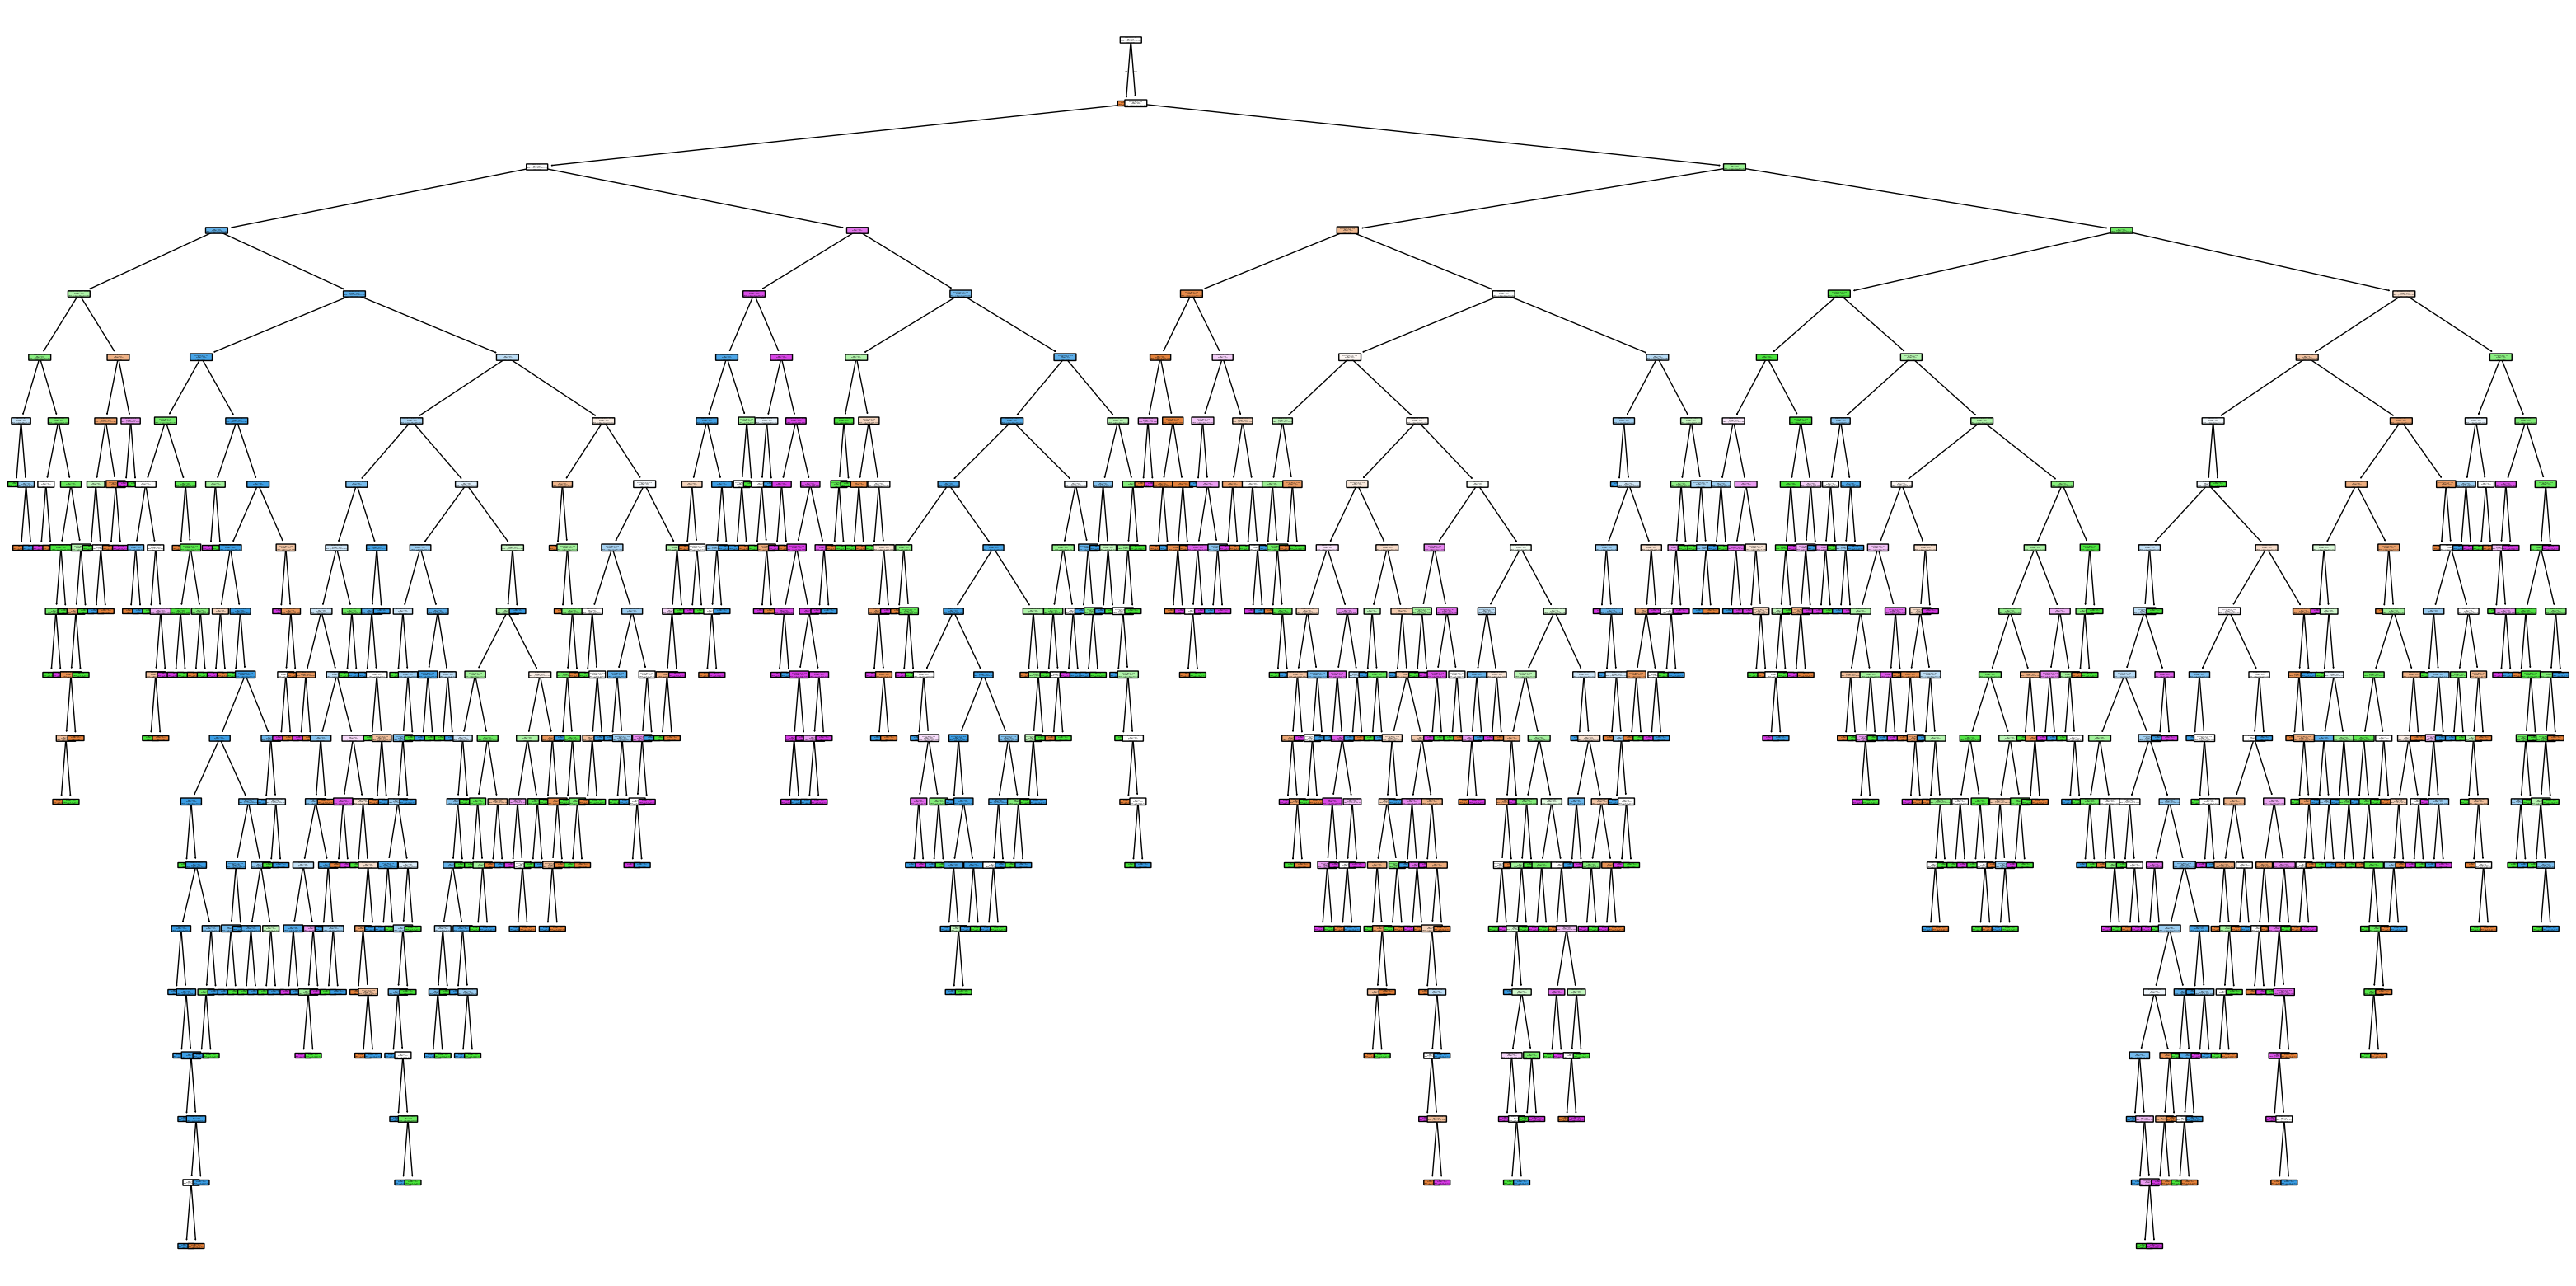

In [ ]:
feature_names = X_train.columns.tolist()
estimator = rf_model.estimators_[0]

plt.figure(figsize=(120, 40))
plot_tree(
    estimator,  
    feature_names=feature_names, 
    class_names=["Sunny", "Cloudy", "Rainy", "Snowy"],  
    filled=True,
    rounded=True,
    max_depth=None,       
    proportion=True,
    impurity=True
)
plt.show()
plt.title("Random Forest Visualization")
plt.close()

In [ ]:
tree_rf_rules = export_text(rf_model, feature_names=list(X.columns))
print(tree_rf_rules)